In [2]:
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
#from torchsummary import summary
#import requests
from PIL import Image

In [3]:
model = torchvision.models.vgg19(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 64.1MB/s]


In [6]:

# Opening the image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/cat.jpg') 

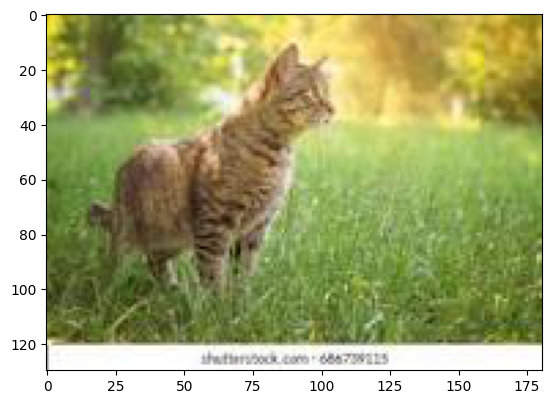

In [7]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/cat.jpg')
plt.imshow(image)
plt.show()

In [8]:
# Preprocess the image
def preprocess(image, size=224):
    transform = T.Compose([
        T.Resize((size,size)),
        T.ToTensor(),
        T.Normalize(mean=[0,0,0], std=[1,1,1]),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(image)

In [ ]:

   #actual normalisation value [0.485, 0.456, 0.406]
#actual standardrddeviation value[0.229, 0.224, 0.225]

tensor(272) tensor(9.7704, grad_fn=<SelectBackward0>)
tensor([[[0.0121, 0.0190, 0.0256,  ..., 0.0112, 0.0183, 0.0145],
         [0.0166, 0.0308, 0.0132,  ..., 0.0195, 0.0280, 0.0169],
         [0.0132, 0.0727, 0.0218,  ..., 0.0157, 0.0131, 0.0057],
         ...,
         [0.0199, 0.0778, 0.0885,  ..., 0.0127, 0.0284, 0.0185],
         [0.0264, 0.0187, 0.0116,  ..., 0.0244, 0.0193, 0.0155],
         [0.0625, 0.0650, 0.0327,  ..., 0.0097, 0.0090, 0.0082]]])


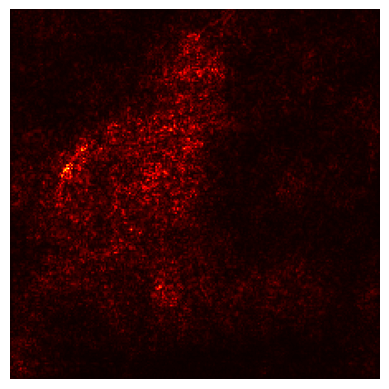

In [9]:
 #preprocess the image
X = preprocess(img)

# we would run the model in evaluation mode
model.eval()

# we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
X.requires_grad_()
'''
forward pass through the model to get the scores, note that VGG-19 model doesn't perform softmax at the end
and we also don't need softmax, we need scores, so that's perfect for us.
'''

scores = model(X)
#print(scores)

# Get the index corresponding to the maximum score and the maximum score itself.
score_max_index = scores.argmax()
score_max = scores[0,score_max_index]
print(score_max_index,score_max)

'''
backward function on score_max performs the backward pass in the computation graph and calculates the gradient of 
score_max with respect to nodes in the computation graph
'''
score_max.backward()

'''
Saliency would be the gradient with respect to the input image now. But note that the input image has 3 channels,
R, G and B. To derive a single class saliency value for each pixel (i, j),  we take the maximum magnitude
across all colour channels.
'''
saliency, _ = torch.max(X.grad.data.abs(),dim=1)
print(saliency)

# code to plot the saliency map as a heatmap
plt.imshow(saliency[0], cmap=plt.cm.hot)
plt.axis('off')
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
